<h1 align="center">Lab 4</h1>

<h2>Imports and Stuff</h2>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import scipy.fftpack as sp

#Displays an image
def displayImage(image,max):
    plt.gray()
    plt.imshow(image, vmin=0, vmax=max)
    plt.show()
    plt.axis("off")
    
#Convert float to uint8
def im2int8(image):
    image = image.astype(np.float32)
    image = 255 * image
    image = image.astype(np.uint8)
    return image

#Converts an image to float32
def im2float32(image):
    type = image.dtype
    if np.issubdtype(type, np.integer):
        info = np.iinfo(image.dtype)
        image = image.astype(np.float32) / info.max
    return image

<h2>Lab Questions</h2>

<b>Question 1:</b> Create simple images such as those given in Figure 1 and simple sin and cos waves in 2D, then find their Fourier Transforms and display the spectrum as images.

<img src="Figure 1.png">

f 1 :




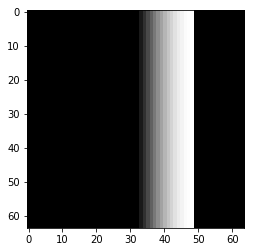

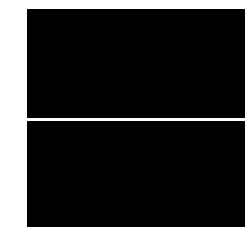

f 2 :




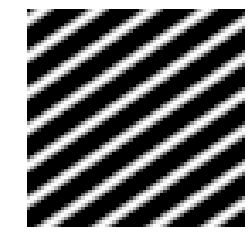

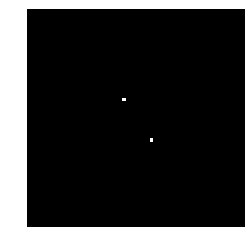

f 3 :




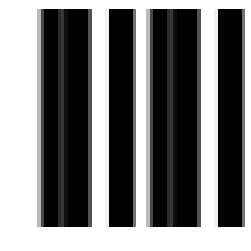

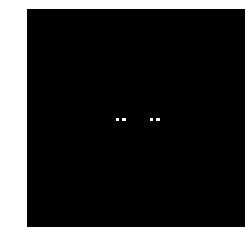

f 4 :




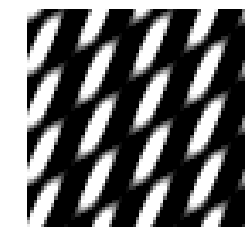

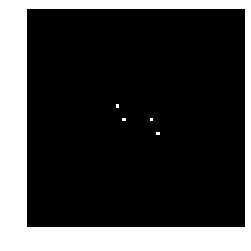

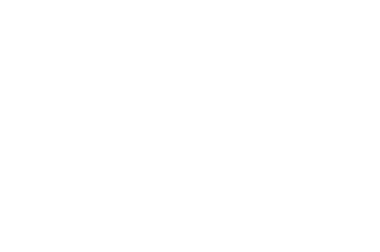

In [105]:
#Takes in two values, M and N, and a step size t, and returns the appropriate meshgrids
def getMeshgrid(M,N,t):
    u = np.arange(-M,M,t)
    v = np.arange(-N,N,t)
    idx=np.where(u>M/2)
    u[idx]=u[idx]-M
    idy=np.where(v>N/2)
    v[idy]=v[idy]-N
    V,U=np.meshgrid(v,u)
    return V,U

#Takes in a function f, and returns F, the FT, S, the Specturm, Fc, the shifted spectrum
def getFourierStuff(f):
    F = sp.fft2(f)
    S = np.abs(F)
    Fc = sp.fftshift(S)
    return F,S,Fc

#Does the lab question for a given function f
def displayFourierStuff(f):
    F,S,Fc = getFourierStuff(f)
    displayImage(f,1)
    displayImage(Fc,1)
    
    
M = 2
N = 2
t = 1/16
G = getMeshgrid(M,N,t)
X = G[0]
Y = G[1]

fs = []
fs.append(np.sin(2*math.pi*X))
fs.append(np.sin(2*math.pi*X + 3*math.pi*Y))
fs.append(np.sin(2*math.pi*X) + np.cos(3*math.pi*X))
fs.append(np.sin(2*math.pi*X) + np.cos(3*math.pi*X+2*math.pi*Y))

for i in range(len(fs)):
    print("f",i+1,":\n\n")
    displayFourierStuff(fs[i])

<b>Question 2:</b> Given a 5 × 5 spatial box filter, h, find the corresponding filter in frequency domain, H. Apply H to image
‘building’. Show original image and filtered image in both spatial and frequency domain.

Original Image:



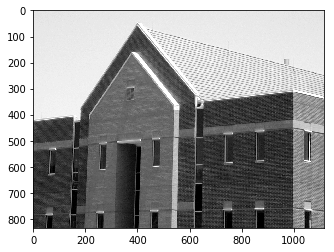

Spatial Filtered Image:



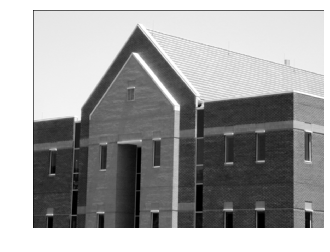

Frequency Filtered Image:



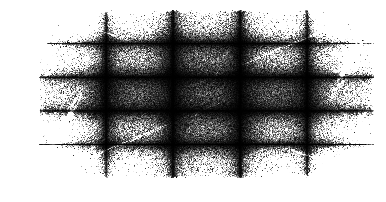

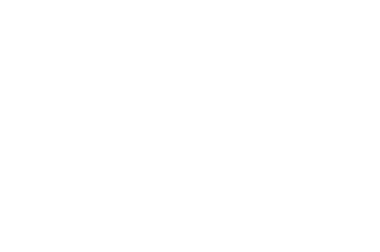

In [142]:
#Creates a box filter of NxN size
def boxFilter(N):
    scalar = 1.0/(N**2)
    mask = np.ones((N,N))
    return np.multiply(scalar,mask)

#Returns the next highest power of 2
def nextPowerOf2(x):  
    return 1 if x == 0 else 2**(x - 1).bit_length()

#Takes in a function f and a filter h and returns the padded fp and hp
def padFunctionAndFilter(f,h):
    A = f.shape[0]
    B = f.shape[1]
    C = h.shape[0]
    D = h.shape[1]
    P = nextPowerOf2(A+C-1)
    Q = nextPowerOf2(B+D-1)
    fp = np.zeros((P,Q))
    hp = np.zeros((P,Q))
    fp[:A,:B] = f
    hp[:C,:D] = h
    return fp,hp

#Takes in a function and a filter, both spatial, and applies the filter in the frequency space. Returns the filtered image
def applyFourierFilter(f,h):
    A = f.shape[0]
    B = f.shape[1]
    fp,hp = padFunctionAndFilter(f,h)
    F = sp.fft2(fp)
    H = sp.fft2(hp)
    G = np.multiply(H,F)
    gp = np.real(sp.ifft2(G))
    g = gp[:A,:B]
    return g,np.abs(G)
    
    

building = im2float32(plt.imread('building.tif'))
print("Original Image:\n")
displayImage(building,1)
g,G = applyFourierFilter(building,boxFilter(5))
print("Spatial Filtered Image:\n")
displayImage(g,1)
print("Frequency Filtered Image:\n")
displayImage(G,1)

<b>Question 3:</b> Replace the filter in the previous question with a Sobel vertical mask, and do the same experiment.

Original Image:



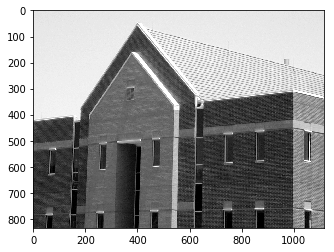

Spatial Filtered Image:



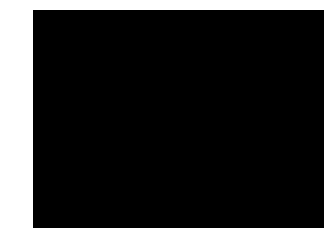

Frequency Filtered Image:



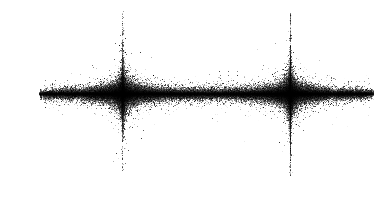

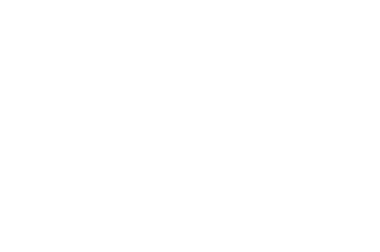

In [156]:
Sobel1 = np.array([[-1,0,-1],[-2,0,-2],[-1,0,-1]])
Sobel2 = np.array([[-1,-2,-1],[0,0,0],[-1,-2,-1]])

print("Original Image:\n")
displayImage(building,1)
g1,G1 = applyFourierFilter(building,Sobel1)
print("Spatial Filtered Image:\n")
displayImage(g1,1)
print("Frequency Filtered Image:\n")
displayImage(G1,1)

<b>Question 4: </b>Given image ‘DIP’, perform the following operations step by step:
<ul>
    <li>multiply the image on the left by $${-1}^{x+y}$$;
    <li>obtain the DFT of resulting image from the previous step;
    <li>take the conjugate of the DFT;
    <li>compute the inverse DFT;
    <li>multiply the real part of the result by $${-1}^{x+y}$$.
</ul>
Explain your result mathematically.

Original Image:


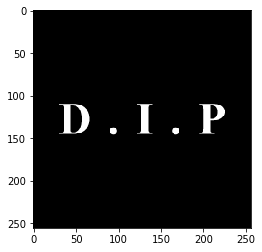

Multiplied by (-1)^(X+Y):


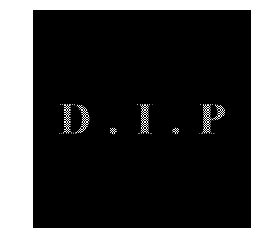

Fouriered: 


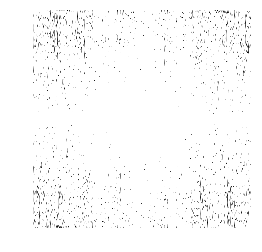

Complex Conjugate: 


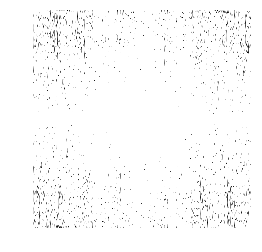

Inverse Taken: 


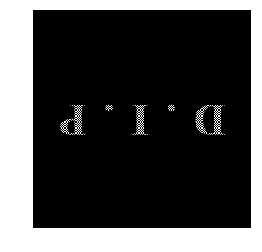

Multiplied by (-1)^(X+Y):


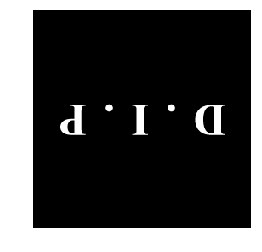

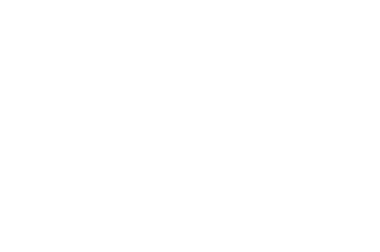

In [179]:
dip = im2float32(plt.imread("DIP.tif"))
print("Original Image:")
displayImage(dip,1)

U = np.arange(0,dip.shape[0],1)
V = np.arange(0,dip.shape[1],1)
[X,Y] = np.meshgrid(U,V)
dipMult = dip * (-1)**(X+Y)
print("Multiplied by (-1)^(X+Y):")
displayImage(dipMult,1)

dipDFT = sp.fft2(dipMult)
print("Fouriered: ")
displayImage(np.abs(dipDFT),1)

dipConj = np.conj(dipDFT)
print("Complex Conjugate: ")
displayImage(np.abs(dipConj),1)

dipInv = sp.ifft2(dipConj)
print("Inverse Taken: ")
displayImage(np.real(dipInv),1)

dipMult2 = np.real(dipInv) * (-1)**(X+Y)
print("Multiplied by (-1)^(X+Y):")
displayImage(dipMult2,1)

This process flips the image vertically. This occurs because the complex conjugate essentially rotates the Fourier Transform by 180 degrees.

<b>Question 5:</b> Implement the basic steps of DFT filtering given in the lecture slides.
<br>
<br>
<br>
Answered above in applyFourierFilter(f,h)

<b>Question 6: </b>Using the implementation from previous step, perform filtering using the low pass and high pass frequency domain
filters for test images ‘lena’ and ‘barbara’.